# Advanced Classification- Predict

## Introduction

In [51]:
import nltk

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

# For precision, recall, etc.
from sklearn.metrics import classification_report

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train_df = train.copy()

In [11]:
train_df.head()

,message,tweetid,sentiment
0,polyscimajor epa chief doesn't think carbon di...,625221,1
1,it's not like we lack evidence of anthropogeni...,126103,1
2,rt @rawstory: researchers say we have three ye...,698562,2
3,#todayinmaker# wired : 2016 was a pivotal year...,573736,1
4,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,1


Reorder columns so that our predicted variable is the last column of the dataframe

In [5]:
column_titles = [col for col in train_df.columns if col!= 'sentiment'] + ['sentiment']
train_df = train_df.reindex(columns=column_titles)

X = train_df.iloc[:, :-1]

y = train_df.iloc[:, -1]

We'll print off a list of all the sentiment analysis polarity in this dataset:

In [30]:
sentiments_list = list(train_df.sentiment.unique())
print(sentiments)

{}


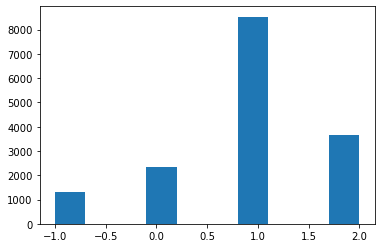

In [7]:
plt.hist(train['sentiment'], label='data');

plt.show()

## Text Cleaning

### Removing Noise

When performing text analytics, removing noise (i.e. unneccesary information) is instrumental in getting the data into a usable format.

For the Tweeter dataset we will be doing the following steps:

- making everything lower case
- removing punctuation

First we make all text lower case to remove noise due to capitalization:

In [18]:
train_df['message'] = train_df['message'].str.lower()

In [19]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [21]:
train_df['message'] = train_df['message'].apply(remove_punctuation)
train_df['message'].iloc[2]

'rt rawstory researchers say we have three years to act on climate change before it’s too late httpstcowdt0kdur2f httpstcoz0anpt…'

### Tokenization

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". Here we use use tokenisers to clean up the data, **making it ready for analysis**.

We use tokenization function `TreebankWordTokenizer` from the `nltk.tokenize` library:

#Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
#Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

In [22]:
from nltk.tokenize import TreebankWordTokenizer

In [25]:
#Try Tweet tokenizer
tokeniser = TreebankWordTokenizer()
train_df['tokens'] = train_df['message'].apply(tokeniser.tokenize)
train_df['tokens'].iloc[5]

['worth',
 'a',
 'read',
 'whether',
 'you',
 'do',
 'or',
 'dont',
 'believe',
 'in',
 'climate',
 'change',
 'httpstcogglzvnyjun',
 'httpstco7afe2mah8j']

### Stemming

**NB!!!!!!!!**

consider removig urls and emojis. Also consider stemming and removing stop words moving forward

Also consider adding rt to the stopwords

## Text feature extraction
### Bag of words

**EDIT THIS!!!!!!!!!!**

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect `dict` style feature sets, so we must therefore transform our text into a `dict`. The Bag of Words model is the simplest method; it constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared.

In [27]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [31]:
sentiments = {}
for sent in sentiments_list:
    df = train_df.groupby('sentiment')
    sentiments[sent] = {} # make the personality type the main key
    for row in df.get_group(sent)['tokens']: # gets the pp group and its tokens
        sentiments[sent] = bag_of_words_count(row, sentiments[sent]) # gives bag of ords for each personality 

In [33]:
df.get_group(1).head()

,message,tweetid,sentiment,tokens
0,polyscimajor epa chief doesnt think carbon dio...,625221,1,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,its not like we lack evidence of anthropogenic...,126103,1,"[its, not, like, we, lack, evidence, of, anthr..."
3,todayinmaker wired 2016 was a pivotal year in...,573736,1,"[todayinmaker, wired, 2016, was, a, pivotal, y..."
4,rt soynoviodetodas its 2016 and a racist sexis...,466954,1,"[rt, soynoviodetodas, its, 2016, and, a, racis..."
5,worth a read whether you do or dont believe in...,425577,1,"[worth, a, read, whether, you, do, or, dont, b..."


In [34]:
sentiments

{1: {'polyscimajor': 1,
  'epa': 268,
  'chief': 66,
  'doesnt': 718,
  'think': 234,
  'carbon': 96,
  'dioxide': 35,
  'is': 2841,
  'main': 25,
  'cause': 108,
  'of': 2604,
  'global': 1594,
  'warming': 1410,
  'and': 1888,
  'wait': 25,
  'what': 353,
  'httpstcoyelvcefxkc': 1,
  'via': 183,
  'mashable': 19,
  'its': 530,
  'not': 673,
  'like': 273,
  'we': 1192,
  'lack': 15,
  'evidence': 72,
  'anthropogenic': 10,
  'todayinmaker': 1,
  'wired': 14,
  '2016': 53,
  'was': 210,
  'a': 2680,
  'pivotal': 3,
  'year': 81,
  'in': 2421,
  'the': 4769,
  'war': 57,
  'on': 1361,
  'climate': 7346,
  'change': 6968,
  'httpstco44wotxtlcd': 1,
  'rt': 5796,
  'soynoviodetodas': 1,
  'racist': 30,
  'sexist': 12,
  'denying': 121,
  'bigot': 6,
  'leading': 60,
  'polls': 4,
  'electionnight': 10,
  'worth': 12,
  'read': 69,
  'whether': 33,
  'you': 910,
  'do': 326,
  'or': 221,
  'dont': 341,
  'believe': 1001,
  'httpstcogglzvnyjun': 1,
  'httpstco7afe2mah8j': 1,
  'thenation':

Next, we create a list of all of the unique words.

In [36]:
all_words = set()
for sent in sentiments_list:
    for word in sentiments[sent]: #getting the word in bag of words for a personality type
        all_words.add(word)

This was done so that we can create a combined bag of words dictionary for all the words in the text.

In [38]:
sentiments['all'] = {}
for sent in sentiments_list:    
    for word in all_words:
        if word in sentiments[sent].keys():
            if word in sentiments['all']:
                sentiments['all'][word] += sentiments[sent][word]
            else:
                sentiments['all'][word] = sentiments[sent][word]

In [39]:
sentiments['all']

{'watson': 3,
 'best': 78,
 '“sin': 1,
 'congratulations': 4,
 'bury': 10,
 'httpstcomjjfij2csj': 1,
 'futuã¢â‚¬â¦': 4,
 'rammadhavbjp': 1,
 '😍😌': 1,
 'mourning': 5,
 'httpstco28jzdqknuc': 1,
 '2⃣': 1,
 'poignant': 1,
 'history': 46,
 'leftã¢â‚¬â¦': 1,
 'spider': 1,
 'climatedeclaration': 1,
 'surgeon': 2,
 'policy…': 2,
 'that’s': 19,
 'embeezyj': 1,
 'announces': 9,
 'httpstco4wxnc3qyg5': 1,
 'easiest': 4,
 'httpstcoffg0yqcstq': 1,
 'shows': 89,
 'citiessun': 1,
 'tabloid': 4,
 'rollindaisies': 1,
 'heye': 1,
 'carfreenyc': 2,
 'actinideage': 1,
 'postcardjohn': 1,
 'wreck': 4,
 'politicomag': 2,
 'httpstcoa6ha5ksk3p': 1,
 'mast': 1,
 'here’s': 18,
 'substantiated': 1,
 'edtech': 1,
 'httpstcoodgppnilrw': 1,
 'httpstcoyc14368e6p': 1,
 'httpstcojbmzz8wooj': 1,
 'httpstcocaocwsi…': 1,
 '🇨🇦❄️☀️️': 1,
 '74': 4,
 'httpstcoimã¢â‚¬â¦': 1,
 'nasaclimate': 3,
 'sum': 1,
 'httpstcotymlu6dbnm': 1,
 'mayormontague': 1,
 'engrkamaldeen': 1,
 'httpstcovpfodfyc0k': 1,
 'httpstcorfmaba8vp4': 1,
 'ga

Now we can easily calculate how many words there are in total.

In [41]:
total_words = sum([v for v in sentiments['all'].values()])
total_words

278214

Go back to 'HOW DO MACHINES UNDERSTAND LANGUAGE FOR FURTHER SELECTION]

ALSO CONSIDER OTHER NLP FETURE SELECTION METHODS YOU LEARNT LAST WEEK FRIDAY

## Training 

In [52]:
# Converting the collection of clean messages to a matrix of token counts
corpus = train_df['message']

vectorizer = CountVectorizer()
count_vectorized = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
#print(X.toarray())

In [54]:
# Converting the collection of clean messages to a matrix of TF-IDF features
data = train_df['message']

vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
vectorized = vectorizer.fit_transform(data)
#print(vectorizer.get_feature_names())
#print(X.toarray())

In [55]:
# Using sparse to train the model using both representations.
import scipy.sparse

# Defining the features as well as the label
X = scipy.sparse.hstack([vectorized, count_vectorized])
y = train_df['sentiment']

In [56]:
from sklearn.model_selection import train_test_split

# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
# Creating a list of all the models to train
lm = LogisticRegression(random_state = 5)

In [60]:
lm.fit(X_train,y_train)

C:\Users\msntu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

In [61]:
pred_lm = lm.predict(X_test)

In [62]:
print('Classification Report')
print(classification_report(y_test, pred_lm))

Classification Report
              precision    recall  f1-score   support

          -1       0.70      0.45      0.55       428
           0       0.56      0.46      0.50       737
           1       0.77      0.85      0.81      2861
           2       0.74      0.75      0.75      1195

    accuracy                           0.74      5221
   macro avg       0.70      0.63      0.65      5221
weighted avg       0.73      0.74      0.73      5221

